In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
def process_df(df):
    df_clean = df[df['train_error'] > 0.0]
    return df_clean

# COV - #Partitions vs. Rounds/Time

### Load data

In [4]:
# 2 EC2 large machines
df_2m = {
    2 : read_csv('../2016-01-24/1453667309-cov-parts_2-frac_1.000000.csv', comment='#'),
    4 : read_csv('../2016-01-24/1453668071-cov-parts_4-frac_1.000000.csv', comment='#'),
    8 : read_csv('../2016-01-24/1453669742-cov-parts_8-frac_1.000000.csv', comment='#'),
    6 : read_csv('../2016-01-24/1453670978-cov-parts_16-frac_1.000000.csv', comment='#'),
}

# 4 EC2 large machines
df_4m = {
    2 : read_csv('../2016-01-25/1453747877-cov-parts_2-frac_1.000000.csv', comment='#'),
    4 : read_csv('../2016-01-25/1453748916-cov-parts_4-frac_1.000000.csv', comment='#'),
    8 : read_csv('../2016-01-25/1453751331-cov-parts_8-frac_1.000000.csv', comment='#'),
    6 : read_csv('../2016-01-25/1453752719-cov-parts_16-frac_1.000000.csv', comment='#'),
}

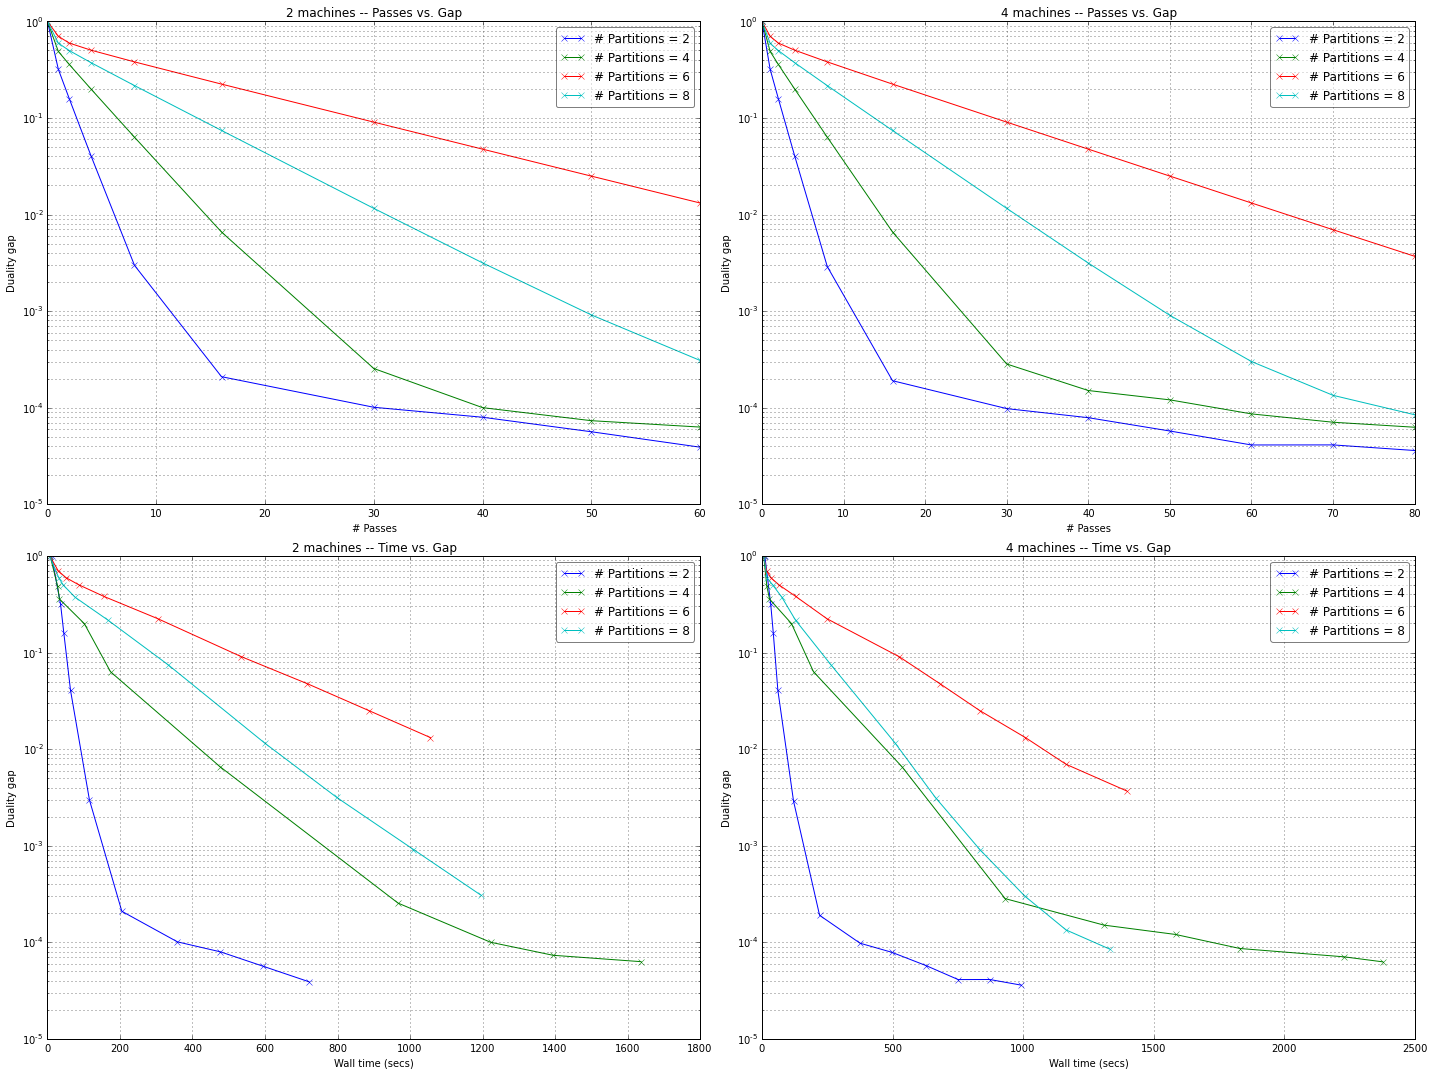

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))

this_ax = axes[0][0]
this_dct = df_2m
for num_part in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_part])
    this_ax.plot(this_df['round'], this_df['gap'], 'x-', label='# Partitions = %d' % num_part)
this_ax.set_yscale('log')
# this_ax.set_ylim(ymin=0.0, ymax=1.1)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xlabel('# Passes')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("2 machines -- Passes vs. Gap")


this_ax = axes[0][1]
this_dct = df_4m
for num_part in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_part])
    this_ax.plot(this_df['round'], this_df['gap'], 'x-', label='# Partitions = %d' % num_part)
this_ax.set_yscale('log')
# this_ax.set_ylim(ymin=0.0, ymax=1.1)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xlabel('# Passes')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("4 machines -- Passes vs. Gap")


this_ax = axes[1][0]
this_dct = df_2m
for num_part in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_part])
    this_ax.plot(this_df['wall_time'], this_df['gap'], 'x-', label='# Partitions = %d' % num_part)
this_ax.set_yscale('log')
# this_ax.set_ylim(ymin=0.0, ymax=1.1)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xlabel('Wall time (secs)')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("2 machines -- Time vs. Gap")


this_ax = axes[1][1]
this_dct = df_4m
for num_part in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_part])
    this_ax.plot(this_df['wall_time'], this_df['gap'], 'x-', label='# Partitions = %d' % num_part)
this_ax.set_yscale('log')
# this_ax.set_ylim(ymin=0.0, ymax=1.1)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xlabel('Wall time (secs)')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("4 machines -- Time vs. Gap")

plt.tight_layout()
plt.show()

2 and 4 EC2 large machines  
No. examples sampled per round = 1.0  
Varying partition size

**Hypothesis**   
As no. of paritions increases, convergence underperforms

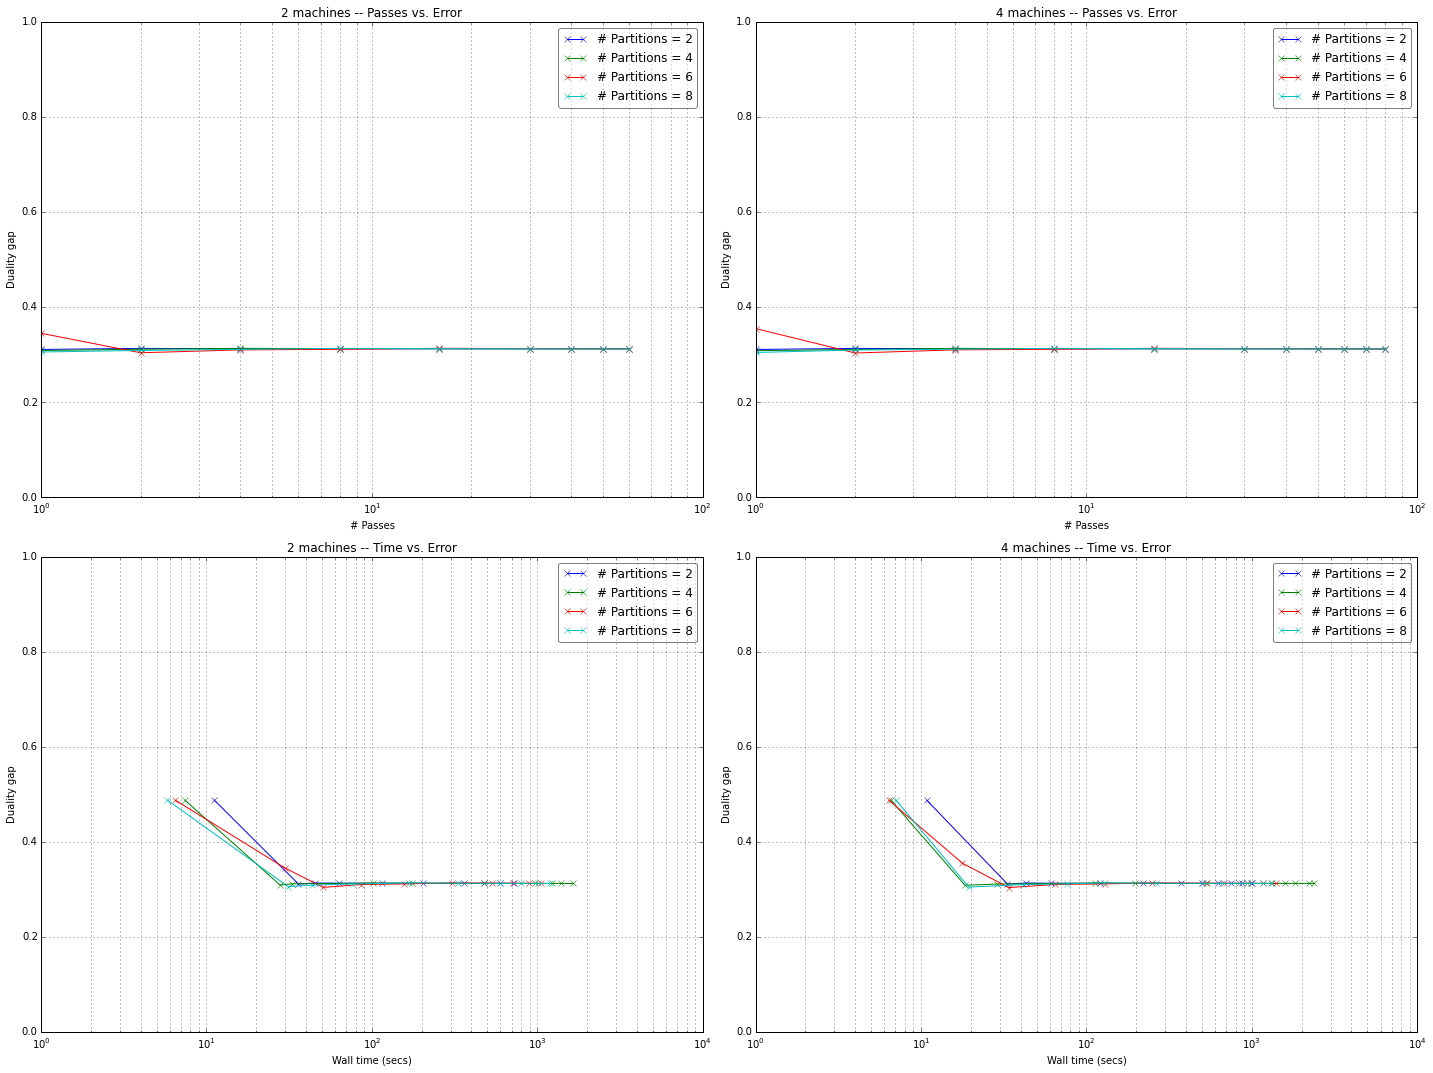

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))

this_ax = axes[0][0]
this_dct = df_2m
for num_part in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_part])
    this_ax.plot(this_df['round'], this_df['train_error'], 'x-', label='# Partitions = %d' % num_part)
this_ax.set_ylim(ymin=0.0, ymax=1.0)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xscale('log')
this_ax.set_xlabel('# Passes')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("2 machines -- Passes vs. Error")


this_ax = axes[0][1]
this_dct = df_4m
for num_part in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_part])
    this_ax.plot(this_df['round'], this_df['train_error'], 'x-', label='# Partitions = %d' % num_part)
this_ax.set_ylim(ymin=0.0, ymax=1.0)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xscale('log')
this_ax.set_xlabel('# Passes')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("4 machines -- Passes vs. Error")


this_ax = axes[1][0]
this_dct = df_2m
for num_part in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_part])
    this_ax.plot(this_df['wall_time'], this_df['train_error'], 'x-', label='# Partitions = %d' % num_part)
this_ax.set_ylim(ymin=0.0, ymax=1.0)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xscale('log')
this_ax.set_xlabel('Wall time (secs)')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("2 machines -- Time vs. Error")


this_ax = axes[1][1]
this_dct = df_4m
for num_part in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_part])
    this_ax.plot(this_df['wall_time'], this_df['train_error'], 'x-', label='# Partitions = %d' % num_part)
this_ax.set_ylim(ymin=0.0, ymax=1.0)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xscale('log')
this_ax.set_xlabel('Wall time (secs)')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("4 machines -- Time vs. Error")

plt.tight_layout()
plt.show()

# COV - Speed-up and Scale-up

Two types of experiments, all with increasing no. of executors

1. Speed-up
  1. *incr*  : 2 partitions of RDD per executor
  2. *const* : Fixed 16 partitions of RDD
2. Scale-up
  1. No. training examples $\propto$ # executors

### Load data

In [16]:
speedup_inc = {
    1 : read_csv('../2016-01-26/1453841913-cov-speedup_inc_parts-parts_2-frac_1.000000.csv', comment='#'),
    2 : read_csv('../2016-01-26/1453844433-cov-speedup_inc_parts-parts_4-frac_1.000000.csv', comment='#'),
    3 : read_csv('../2016-01-26/1453850929-cov-speedup_inc_parts-parts_6-frac_1.000000.csv', comment='#'),
    4 : read_csv('../2016-01-26/1453856045-cov-speedup_inc_parts-parts_8-frac_1.000000.csv', comment='#'),
}

speedup_const = {
    1 : read_csv('../2016-01-26/1453859885-cov-speedup_16_parts-parts_16-frac_1.000000.csv', comment='#'),
    2 : read_csv('../2016-01-26/1453864104-cov-speedup_16_parts-parts_16-frac_1.000000.csv', comment='#'),
    3 : read_csv('../2016-01-26/1453868411-cov-speedup_16_parts-parts_16-frac_1.000000.csv', comment='#'),
    4 : read_csv('../2016-01-26/1453872610-cov-speedup_16_parts-parts_16-frac_1.000000.csv', comment='#'),
}

scaleup_const = {
    1 : read_csv('../2016-01-26/1453876881-cov-scaleup_inc_parts-parts_2-frac_0.200000.csv', comment='#'),
    2 : read_csv('../2016-01-26/1453877713-cov-scaleup_inc_parts-parts_4-frac_0.400000.csv', comment='#'),
    # 3 : read_csv('../2016-01-26/', comment='#'),
    # 4 : read_csv('../2016-01-26/', comment='#'),
}

## Speed up - 2 partitions / executor

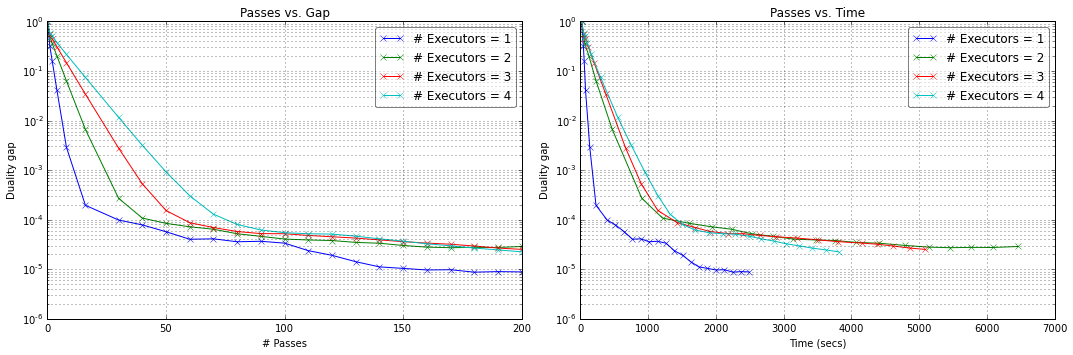

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

this_ax = axes[0]
this_dct = speedup_inc
for num_exec in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_exec])
    this_ax.plot(this_df['round'], this_df['gap'], 'x-', label='# Executors = %d' % num_exec)
this_ax.set_yscale('log')
# this_ax.set_ylim(ymin=0.0, ymax=1.1)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xlabel('# Passes')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("Passes vs. Gap")


this_ax = axes[1]
this_dct = speedup_inc
for num_exec in sorted(this_dct.keys()):
    this_df = process_df(this_dct[num_exec])
    this_ax.plot(this_df['time'], this_df['gap'], 'x-', label='# Executors = %d' % num_exec)
this_ax.set_yscale('log')
# this_ax.set_ylim(ymin=0.0, ymax=1.1)
this_ax.grid(b=True, which='both',axis='both')
this_ax.set_xlabel('Time (secs)')
this_ax.set_ylabel('Duality gap')
this_ax.legend(loc="best", fancybox=True, framealpha=0.5)
this_ax.set_title("Passes vs. Time")

plt.tight_layout()
plt.show()